<a href="https://colab.research.google.com/github/SafaaFathii/Dry-Beans-Classification/blob/main/notebooks/Dry_bean_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
import catboost as cb
from IPython.core.pylabtools import figsize
import plotly.express as px
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

import lightgbm as lgb
from sklearn import metrics

from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.combine import SMOTETomek


In [ ]:
df_Train = pd.read_csv("train.csv",index_col="ID")
#df_Train.head(5)

In [ ]:
df_Test = pd.read_csv("test.csv",index_col="ID")
#df_Test.head(5)

Explore Training Data 

In [ ]:
df_Train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [ ]:
df_Train.nunique()

Area                9794
Perimeter          10748
MajorAxisLength    10834
MinorAxisLength    10834
AspectRation       10834
Eccentricity       10834
ConvexArea          9908
EquivDiameter       9794
Extent             10830
Solidity           10824
roundness          10834
Compactness        10834
ShapeFactor1       10834
ShapeFactor2       10834
ShapeFactor3       10834
ShapeFactor4       10834
y                      7
dtype: int64

In [ ]:
df_Train.shape

(10834, 17)

In [ ]:
# Q1 = df_Train.quantile(0.25)
# Q3 = df_Train.quantile(0.75)
# IQR = Q3 - Q1
# df_Train = df_Train[~((df_Train < (Q1 - 1.5 * IQR)) |(df_Train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Q1 = df_Test.quantile(0.25)
# Q3 = df_Test.quantile(0.75)
# IQR = Q3 - Q1
# df_Test = df_Test[~((df_Test < (Q1 - 1.5 * IQR)) |(df_Test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_Train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [ ]:
df_Train["Area"] = np.log(df_Train["Area"])
df_Train["Perimeter"] = np.log(df_Train["Perimeter"])
df_Train["MajorAxisLength"] = np.log(df_Train["MajorAxisLength"])
df_Train["AspectRation"] = np.log(df_Train["AspectRation"])
df_Train["ConvexArea"] = np.log(df_Train["ConvexArea"])
df_Train["EquivDiameter"] = np.log(df_Train["EquivDiameter"])
df_Train["MinorAxisLength"] = np.log(df_Train["MinorAxisLength"])

df_Train["Solidity"] = np.log(max(df_Train.loc[:, "Solidity"] + 1) - df_Train.loc[:, "Solidity"])
df_Train["Eccentricity"] = np.log(max(df_Train.loc[:, "Eccentricity"] + 1) - df_Train.loc[:, "Eccentricity"])
df_Train["Extent"] = np.log(max(df_Train.loc[:, "Extent"] + 1) - df_Train.loc[:, "Extent"])
df_Train["roundness"] = np.log(max(df_Train.loc[:, "roundness"] + 1) - df_Train.loc[:, "roundness"])
df_Train["ShapeFactor4"] = np.log(max(df_Train.loc[:, "ShapeFactor4"] + 1) - df_Train.loc[:, "ShapeFactor4"])
df_Train["ShapeFactor1"] = np.log(max(df_Train.loc[:, "ShapeFactor1"] + 1) - df_Train.loc[:, "ShapeFactor1"])


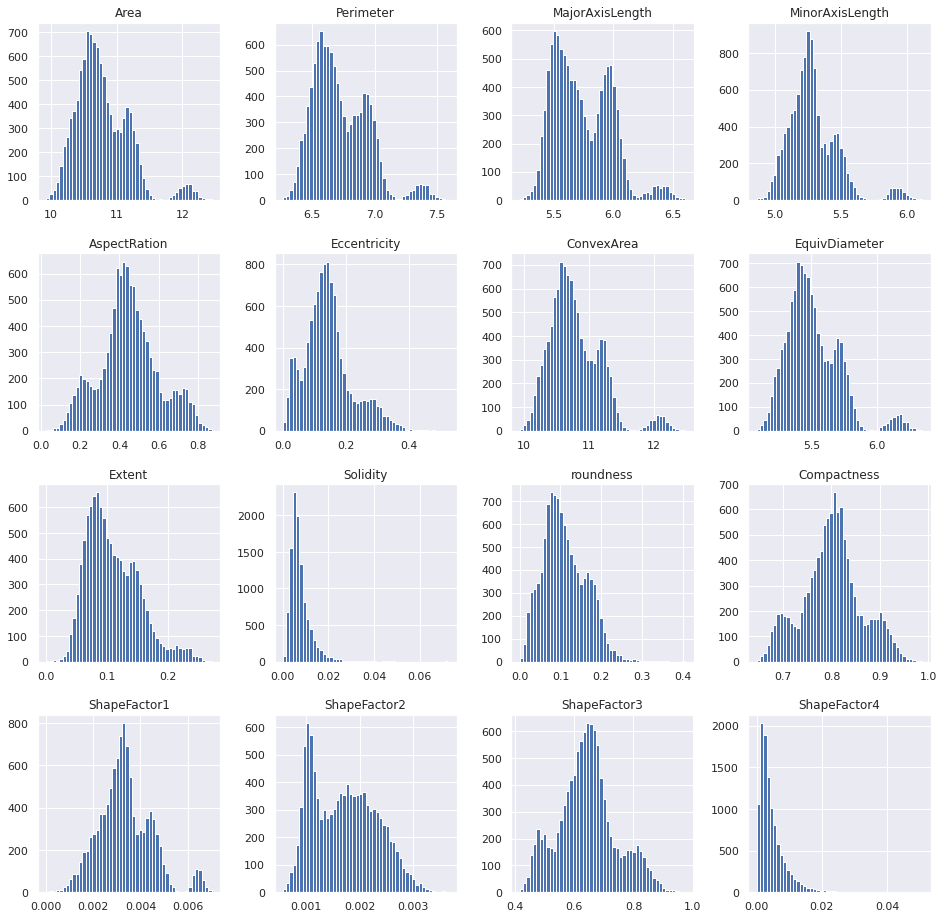

In [ ]:
%matplotlib inline
df_Train.drop(["y"],axis=1).hist(bins=50, figsize=(16,16))
plt.show()

In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
df_trans = trans.fit_transform(df_Train.drop(["y"],axis=1))
df_Train2 = pd.DataFrame(df_trans,columns=df_Train.drop(["y"],axis=1).columns)
df_Train2["y"] = df_Train["y"]
df_Train = df_Train2

In [ ]:
# %matplotlib inline
# df_Train.drop(["y"],axis=1).hist(bins=50, figsize=(16,16))
# plt.show()

In [ ]:
df_Train.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.991678,0.952371,0.897050,0.427246,-0.427341,0.999921,1.000000,-0.007981,0.231643,0.542053,-0.432070,0.891895,-0.785758,-0.432067,0.477017
Perimeter,0.991678,1.000000,0.965389,0.859947,0.480231,-0.480334,0.992572,0.991678,0.023424,0.299630,0.624905,-0.485166,0.853975,-0.820389,-0.485163,0.511956
MajorAxisLength,0.952371,0.965389,1.000000,0.737011,0.645309,-0.645267,0.952841,0.952371,0.057169,0.282154,0.665537,-0.649337,0.729483,-0.924764,-0.649323,0.577501
MinorAxisLength,0.897050,0.859947,0.737011,1.000000,0.000885,-0.000974,0.896230,0.897050,-0.131624,0.101622,0.223505,-0.006598,0.999381,-0.454600,-0.006593,0.254284
AspectRation,0.427246,0.480231,0.645309,0.000885,1.000000,-0.999991,0.428726,0.427246,0.256097,0.351430,0.790748,-0.999697,-0.010957,-0.853939,-0.999697,0.600496
Eccentricity,-0.427341,-0.480334,-0.645267,-0.000974,-0.999991,1.000000,-0.428821,-0.427341,-0.256191,-0.351468,-0.790890,0.999689,0.010871,0.853810,0.999690,-0.600391
ConvexArea,0.999921,0.992572,0.952841,0.896230,0.428726,-0.428821,1.000000,0.999921,-0.005907,0.241132,0.547037,-0.433695,0.890912,-0.786813,-0.433691,0.481991
EquivDiameter,1.000000,0.991678,0.952371,0.897050,0.427246,-0.427341,0.999921,1.000000,-0.007981,0.231643,0.542053,-0.432070,0.891895,-0.785758,-0.432067,0.477017
Extent,-0.007981,0.023424,0.057169,-0.131624,0.256097,-0.256191,-0.005907,-0.007981,1.000000,0.208150,0.264603,-0.256019,-0.135874,-0.144169,-0.256033,0.110457
Solidity,0.231643,0.299630,0.282154,0.101622,0.351430,-0.351468,0.241132,0.231643,0.208150,1.000000,0.666620,-0.361870,0.087463,-0.349518,-0.361860,0.585709


In [ ]:
#df_Train.drop(["EquivDiameter","ConvexArea","roundness","Compactness","AspectRation"],axis=1,inplace=True)
#df_Test.drop(["EquivDiameter","ConvexArea","roundness","Compactness","AspectRation"],axis=1,inplace=True)

In [ ]:
df_Train.duplicated().sum()

0

In [ ]:
df_Train["y"].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [ ]:
def removeOutliers(new_df,df_Test):
    for col in new_df.drop(["y"],axis=1):
        for value in list(new_df["y"].unique()):
            Area_DERMASON = new_df[col].loc[new_df['y'] == value].values
            if Area_DERMASON.size != 0:

                q25, q75 = np.percentile(Area_DERMASON, 25), np.percentile(Area_DERMASON, 75)
                print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
                Area_DERMASON_iqr = q75 - q25
                print('iqr: {}'.format(Area_DERMASON_iqr))
                Area_DERMASON_cut_off = Area_DERMASON_iqr * 1.5
                Area_DERMASON_lower, Area_DERMASON_upper = q25 - Area_DERMASON_cut_off, q75 + Area_DERMASON_cut_off
                print('Cut Off: {}'.format(Area_DERMASON_cut_off))
                print('Area Lower: {}'.format(Area_DERMASON_lower))
                print('Area Upper: {}'.format(Area_DERMASON_upper))
                outliers = [x for x in Area_DERMASON if x < Area_DERMASON_lower or x > Area_DERMASON_upper]
                print('len Area Outliers: {}'.format(len(outliers)))
                print('Area outliers:{}'.format(outliers))
                new_df = new_df.drop(new_df[(new_df[col] > Area_DERMASON_upper) | (new_df[col] < Area_DERMASON_lower)].index)
                df_Test = df_Test.drop(df_Test[(df_Test[col] > Area_DERMASON_upper) | (df_Test[col] < Area_DERMASON_lower)].index)
                print('----' * 44)
removeOutliers(df_Train,df_Test)

Quartile 25: 0.24832337597167353 | Quartile 75: 0.5942599142988667
iqr: 0.3459365383271932
Cut Off: 0.5189048074907898
Area Lower: -0.2705814315191163
Area Upper: 1.1131647217896565
len Area Outliers: 80
Area outliers:[-0.38739402570527054, -0.5612454121826296, -0.4123292027153603, -0.5265549820008878, -0.5727668771984117, -0.2853994790433005, -0.3719459452982507, -0.9527501347227425, -0.5492211668071358, -0.35588201406677683, -0.634319624181223, -0.916054619408069, -0.7808086379275825, -0.340116578878191, -0.2764069479021778, -0.43714694116456587, -0.49899965600799956, -0.6660945922724889, -0.40829282545797546, -0.6069552609910491, -0.29280715412240405, -0.9831615447126656, -0.35357761255305015, -0.3697829925369494, -0.3599231864163652, -0.8943856332261402, -0.39031187521756233, -0.36041876916076815, -0.39289130475657685, -0.6116251673094931, -0.7189488574892872, -0.3845675466368658, -0.3560467483998799, -0.8728245713760642, -0.8916701522512265, -0.36000577220629754, -0.28161715574490

In [ ]:
df_Train.shape

(10834, 17)

In [ ]:
df_Test.shape

(2709, 16)

In [ ]:
df_Train.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

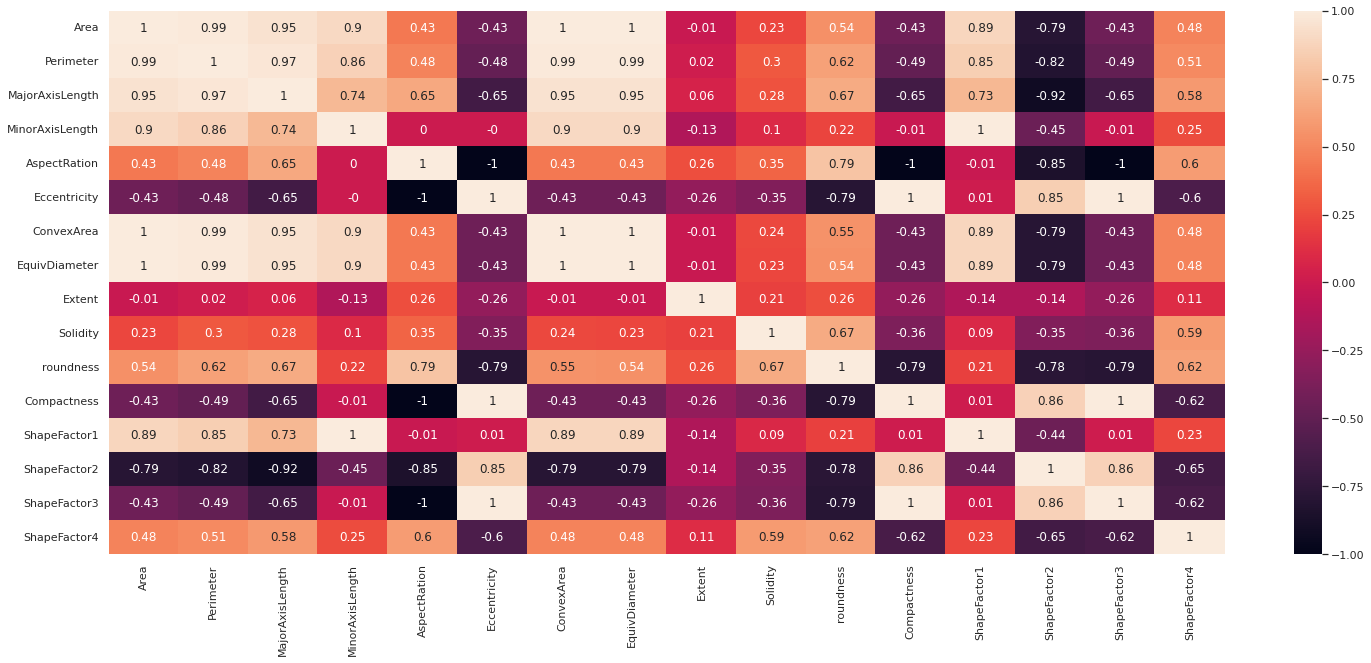

In [ ]:
matrix = df_Train.corr().round(2)
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
px.imshow(df_Train.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [ ]:
#plt.figure(figsize=(15,10))
#sns.pairplot(df_Train,hue="y")
#plt.title("Looking for Insites in Data")
#plt.legend("y")
#plt.tight_layout()
#plt.plot()

In [ ]:
X = df_Train.drop(["y"],axis=1)

In [ ]:
transformer = RobustScaler().fit(X)
#transformer = MinMaxScaler().fit(X)
transformer

RobustScaler()

In [ ]:
df_Train2 = transformer.fit_transform(df_Train.drop(["y"],axis=1))

In [ ]:
df_Train2 = pd.DataFrame(df_Train2, columns =X.columns)

In [ ]:
df_Train2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.436395,0.487863,0.724330,-0.178332,1.375962,-1.376126,0.433808,0.436395,1.691001,0.188012,1.157675,-1.336932,-0.161707,-1.156083,-1.337009,-0.877242
1,-0.006939,-0.172341,-0.315850,0.458632,-1.044322,1.044251,-0.017854,-0.006939,-0.183742,-1.988652,-1.751147,1.037951,0.464698,0.739110,1.037953,-0.293427
2,-0.844014,-0.902372,-0.795088,-0.707704,-0.527844,0.527828,-0.844613,-0.844014,-0.888888,-0.025520,-0.736490,0.534168,-0.699790,0.637792,0.534165,-0.437664
3,-0.331877,-0.300878,-0.280058,-0.264754,-0.400704,0.400709,-0.331479,-0.331877,-0.086898,-0.189182,-0.294177,0.417409,-0.245434,0.314929,0.417407,-1.526468
4,-0.100463,-0.083530,-0.141226,0.024032,-0.412712,0.412703,-0.100142,-0.100463,0.370395,-0.035312,-0.070421,0.414347,0.031853,0.218920,0.414344,-0.029633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.404247,-0.412883,-0.561670,0.006050,-0.855558,0.855453,-0.404915,-0.404247,-0.160523,-0.372291,-0.657581,0.854311,0.020981,0.786703,0.854290,-0.424966
10830,-0.802778,-0.781602,-0.608532,-0.794266,-0.238793,0.238808,-0.803420,-0.802778,0.348536,0.095477,-0.339083,0.245553,-0.785169,0.441849,0.245553,-0.398065
10831,1.049484,0.958085,1.110883,0.858573,0.715745,-0.715786,1.035217,1.049484,-0.188637,-0.929692,0.294400,-0.701612,0.864209,-0.883502,-0.701612,0.388964
10832,0.159322,0.121817,0.100686,0.211109,0.011312,-0.011300,0.156003,0.159322,1.056236,-0.032923,-0.046939,-0.019406,0.207586,-0.076225,-0.019406,0.322431


In [ ]:
df_Train2["y"] = df_Train["y"]

In [ ]:
df_Train = df_Train2

In [ ]:
df_Train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0.436395,0.487863,0.724330,-0.178332,1.375962,-1.376126,0.433808,0.436395,1.691001,0.188012,1.157675,-1.336932,-0.161707,-1.156083,-1.337009,-0.877242,HOROZ
1,-0.006939,-0.172341,-0.315850,0.458632,-1.044322,1.044251,-0.017854,-0.006939,-0.183742,-1.988652,-1.751147,1.037951,0.464698,0.739110,1.037953,-0.293427,SEKER
2,-0.844014,-0.902372,-0.795088,-0.707704,-0.527844,0.527828,-0.844613,-0.844014,-0.888888,-0.025520,-0.736490,0.534168,-0.699790,0.637792,0.534165,-0.437664,DERMASON
3,-0.331877,-0.300878,-0.280058,-0.264754,-0.400704,0.400709,-0.331479,-0.331877,-0.086898,-0.189182,-0.294177,0.417409,-0.245434,0.314929,0.417407,-1.526468,DERMASON
4,-0.100463,-0.083530,-0.141226,0.024032,-0.412712,0.412703,-0.100142,-0.100463,0.370395,-0.035312,-0.070421,0.414347,0.031853,0.218920,0.414344,-0.029633,SIRA


In [ ]:
df_Train.shape

(10834, 17)

In [ ]:
transformer = MinMaxScaler().fit(df_Test)
df_Test2 = transformer.fit_transform(df_Test)
df_Test2 = pd.DataFrame(df_Test2, columns =df_Test.columns)
df_Test = df_Test2
df_Test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.176284,0.326010,0.384512,0.219474,0.671244,0.923647,0.185606,0.286877,0.174218,0.283799,0.532371,0.170609,0.514391,0.137476,0.140861,0.259451
1,0.039066,0.079952,0.086840,0.109856,0.290223,0.704878,0.039146,0.077894,0.720788,0.870792,0.816468,0.561899,0.679714,0.625947,0.510147,0.964772
2,0.162119,0.292393,0.235638,0.307641,0.235157,0.643529,0.165189,0.268226,0.666956,0.694580,0.615819,0.626656,0.374121,0.445200,0.577471,0.917530
3,0.020326,0.040547,0.057033,0.074849,0.296222,0.710795,0.020257,0.042153,0.530918,0.880329,0.872610,0.555630,0.762320,0.683242,0.503723,0.977656
4,0.576207,0.687380,0.643315,0.664518,0.342004,0.751899,0.579292,0.691524,0.859266,0.859997,0.714562,0.495637,0.120230,0.134543,0.443083,0.841017


In [ ]:
transformer = RobustScaler().fit(df_Test)
df_Test2 = transformer.fit_transform(df_Test)
df_Test2 = pd.DataFrame(df_Test2, columns =df_Test.columns)
df_Test = df_Test2
df_Test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.520446,0.575877,0.718748,0.104210,1.505826,1.007202,0.582604,0.506053,-2.022461,-7.258362,-1.063135,-1.417402,0.057203,-0.685599,-1.330742,-8.251666
1,-0.613178,-0.590196,-0.542599,-0.801749,-0.380872,-0.443922,-0.609116,-0.706740,0.130032,-0.111303,0.312151,0.414450,0.978391,0.639939,0.423709,0.386672
2,0.403422,0.416565,0.087912,0.832885,-0.653544,-0.850863,0.416475,0.397818,-0.081968,-2.256808,-0.659175,0.717614,-0.724390,0.149454,0.743559,-0.191921
3,-0.767993,-0.776935,-0.668905,-1.091067,-0.351167,-0.404675,-0.762815,-0.914158,-0.617710,0.004814,0.583925,0.385102,1.438674,0.795418,0.393190,0.544463
4,3.824386,2.288415,1.815390,3.782368,-0.124471,-0.132029,3.785950,2.854354,0.675381,-0.242750,-0.181170,0.104239,-2.139084,-0.693560,0.105094,-1.129006


In [ ]:
le = preprocessing.LabelEncoder()
df_Train['y'] = le.fit_transform(df_Train['y'])

In [ ]:
X = df_Train.drop(["y"],axis=1)
y = df_Train["y"]

In [ ]:
cb_params = {'iterations': 10000,
             'learning_rate': 0.118904169525507,
             'loss_function': 'MultiClass',
             'eval_metric': 'Accuracy',
             'l2_leaf_reg': 1.6163189485316596,
             'bagging_temperature': 0.14353551008899088,
             'random_strength': 1.29,
             'depth': 10,
             'grow_policy': 'SymmetricTree',
             'leaf_estimation_method': 'Gradient',
             'od_type': 'Iter',
             'early_stopping_rounds': 300,
             'border_count': 254,
             'use_best_model': True,
             'min_data_in_leaf': 150,
             'task_type': 'GPU',
             'random_seed': 42}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
# skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# oof_preds = np.zeros((X.shape[0],))
# preds = np.zeros((X_test.shape[0],len(np.unique(y))))
# model_fi = 0
# total_mean_acc = 0
# for num, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
#     X_train, X_test = X.loc[train_idx], X.loc[valid_idx]
#     y_train, y_test = y.loc[train_idx], y.loc[valid_idx]
#     model = CatBoostClassifier(**cb_params)
#     model.fit(X_train, y_train,verbose=False,eval_set=(X_test, y_test))
#     pred = model.predict(X_test).flatten()
#     fold_acc = accuracy_score(y_test, pred)
#     print(f"Fold {num} accuracy: {fold_acc}")

In [ ]:
df_Train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,10834.000000,10834.000000,10834.000000,1.083400e+04,10834.000000,1.083400e+04,10834.000000,10834.000000,1.083400e+04,1.083400e+04,10834.000000
mean,-0.000298,0.000793,-0.000380,0.000380,0.000985,-1.325512e-03,0.000116,-0.000298,0.000750,-1.045916e-03,-0.001418,-1.555777e-03,0.001221,-0.001801,-1.598999e-03,-1.181394e-03,3.530367
std,0.734732,0.735086,0.737006,0.734883,0.734429,7.340183e-01,0.734587,0.734732,0.733838,7.304405e-01,0.733369,7.351667e-01,0.735478,0.735038,7.351677e-01,7.336606e-01,1.832920
min,-3.849990,-3.857244,-3.864603,-3.853338,-3.854724,-3.855502e+00,-3.850698,-3.849990,-3.858489,-3.851586e+00,-3.858200,-3.859321e+00,-3.855978,-3.860836,-3.859315e+00,-3.857225e+00,0.000000
25%,-0.500949,-0.500217,-0.499757,-0.499653,-0.498846,-5.011623e-01,-0.500477,-0.500949,-0.499660,-5.005059e-01,-0.500158,-5.009006e-01,-0.498077,-0.501831,-5.009020e-01,-5.002047e-01,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-4.065758e-20,0.000000,0.000000,0.000000,-4.065758e-20,0.000000,-8.131516e-20,0.000000,0.000000,7.962110e-20,-3.726945e-20,3.000000
75%,0.499051,0.499783,0.500243,0.500347,0.501154,4.988377e-01,0.499523,0.499051,0.500340,4.994941e-01,0.499842,4.990994e-01,0.501923,0.498169,4.990980e-01,4.997953e-01,5.000000
max,3.849482,3.859648,3.862955,3.853438,3.855526,3.854734e+00,3.850661,3.849482,3.859177,3.850441e+00,3.856574,3.857387e+00,3.857091,3.857809,3.857388e+00,3.856003e+00,6.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yPred = lr.predict(df_Test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9218793055938275
0.9278523489932886


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8929457150730229
0.8906599552572707


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9007991182143841
0.897930648769575


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7661890327914026
0.7491610738255033


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma=0.9))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9556351612014329
0.9180648769574944


In [ ]:
clf= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=5,n_estimators=200,
                             max_depth=4, learning_rate=0.12, gamma=0.8, colsample_bytree=0.4)

clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.9720308624965556
0.9326062639821029


In [ ]:
clf = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.5, reg_lambda=0.5,reg_alpha=1, num_leaves=5, 
                             n_estimators=200, min_child_samples=6, max_depth=5, learning_rate=0.21, 
                             colsample_bytree=0.3, boosting_type='goss', metric='multi_error', num_class=7)

clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9680352714246349
0.9317673378076062


In [ ]:
clf= cb.CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=4, iterations=600, depth= 6)

clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0:	learn: 1.5656461	total: 62.2ms	remaining: 37.2s
1:	learn: 1.3396019	total: 130ms	remaining: 38.8s
2:	learn: 1.1743478	total: 187ms	remaining: 37.2s
3:	learn: 1.0529469	total: 254ms	remaining: 37.9s
4:	learn: 0.9568227	total: 318ms	remaining: 37.8s
5:	learn: 0.8770851	total: 385ms	remaining: 38.1s
6:	learn: 0.8113463	total: 450ms	remaining: 38.1s
7:	learn: 0.7510652	total: 518ms	remaining: 38.3s
8:	learn: 0.6951718	total: 594ms	remaining: 39s
9:	learn: 0.6459922	total: 631ms	remaining: 37.2s
10:	learn: 0.6046275	total: 738ms	remaining: 39.5s
11:	learn: 0.5687195	total: 807ms	remaining: 39.5s
12:	learn: 0.5367896	total: 871ms	remaining: 39.3s
13:	learn: 0.5087605	total: 921ms	remaining: 38.5s
14:	learn: 0.4854097	total: 978ms	remaining: 38.1s
15:	learn: 0.4638400	total: 1.03s	remaining: 37.7s
16:	learn: 0.4454179	total: 1.08s	remaining: 37.2s
17:	learn: 0.4268309	total: 1.14s	remaining: 36.7s
18:	learn: 0.4111564	total: 1.19s	remaining: 36.4s
19:	learn: 0.3969634	total: 1.24s	remainin